In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


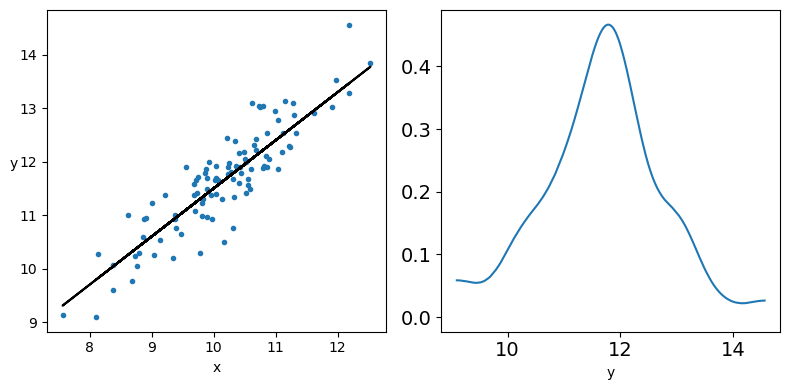

In [2]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)
x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x

y = y_real + eps_real
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()


c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 92 seconds.
There were 67 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6890702545666217, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8846969795061402, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


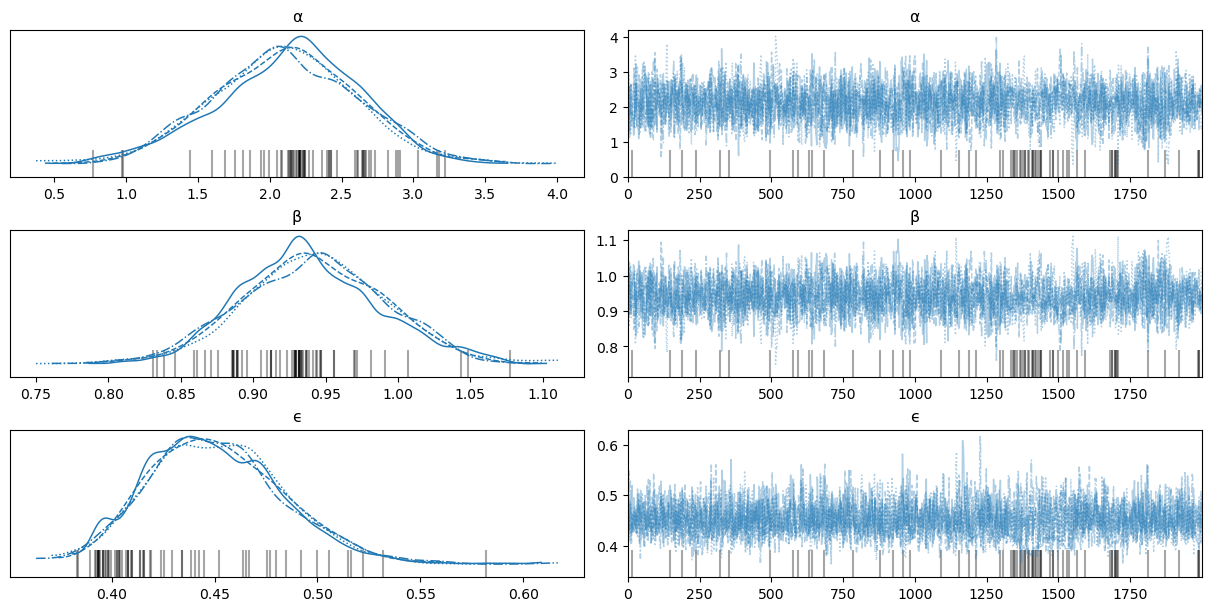

In [5]:
with pm.Model() as model_g:
 α = pm.Normal('α', mu=0, sd=10)
 β = pm.Normal('β', mu=0, sd=1)
 ϵ = pm.HalfCauchy('ϵ', 5)
 μ = pm.Deterministic('μ', α + β * x)
 #y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
 y_pred = pm.Normal('y_pred', mu= α + β * x, sd=ϵ, observed=y)
 trace_g = pm.sample(2000, tune=1000)
 az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\plots\pairplot.py:185: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  warnings.warn(
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<Axes: xlabel='α', ylabel='β'>

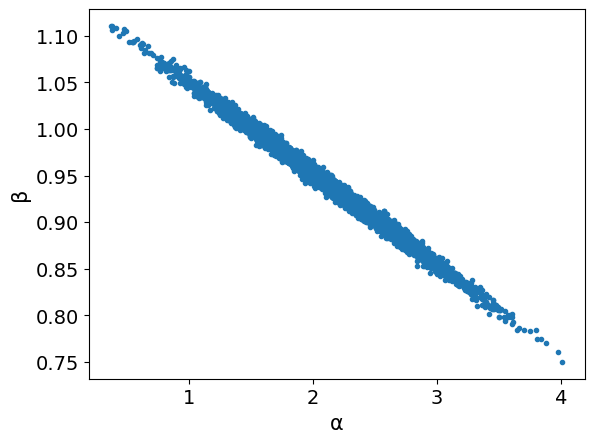

In [6]:
 az.plot_pair(trace_g, var_names=['α', 'β'], plot_kwargs={'alpha': 0.1})